In [63]:
# a useful link
#  https://scikit-learn.org/stable/modules/model_evaluation.html
#special request as promised

In [64]:
import pandas as pd
import numpy as np
data = pd.read_csv('Real estate.csv')
origdata=data
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [65]:
data.head() # lets predict `Y house price unit area`
# remember that removing `No` column can increase your result

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [66]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [67]:
y = data.iloc[:,-1]
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [68]:
data.drop('Y house price of unit area', axis=1, inplace=True)  # drop columns
data.drop('No', axis=1, inplace=True)  # drop columns
data.drop('X1 transaction date', axis=1, inplace=True)  # drop columns
data.drop('X5 latitude', axis=1, inplace=True)  # drop columns
data.drop('X6 longitude', axis=1, inplace=True)  # drop columns


In [69]:
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5
...,...,...,...
409,13.7,4082.01500,0
410,5.6,90.45606,9
411,18.8,390.96960,7
412,8.1,104.81010,5


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

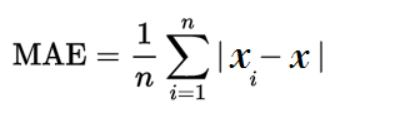

In [71]:
from IPython.display import Image
Image(filename='mae.jpg')  # Never use accuracy or confusion matrix when you have Regression task!

In [72]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 6.362370630628733


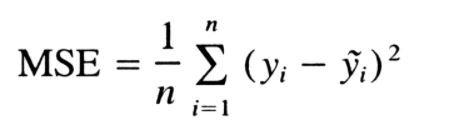

In [73]:
from IPython.display import Image
Image(filename='mse.jpg') 

In [74]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 119.36009326395077


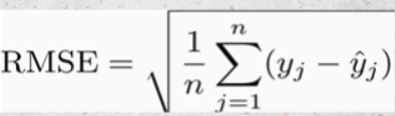

In [75]:
from IPython.display import Image
Image(filename='rmse.jpg') 

In [76]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 10.925204495292103


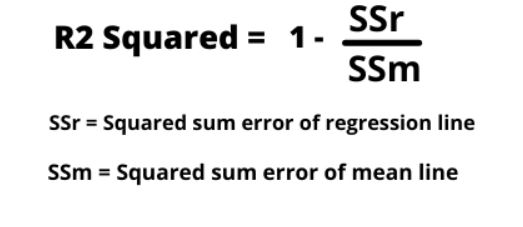

In [77]:
from IPython.display import Image
Image(filename='r2.jpg')

In [78]:
from sklearn.metrics import r2_score  # It explains how well a model performs when replicating the observed outcomes
r2 = r2_score(y_test,y_pred)
print(r2)  #remember its near to 1 meaning its good 

0.4615959935866515


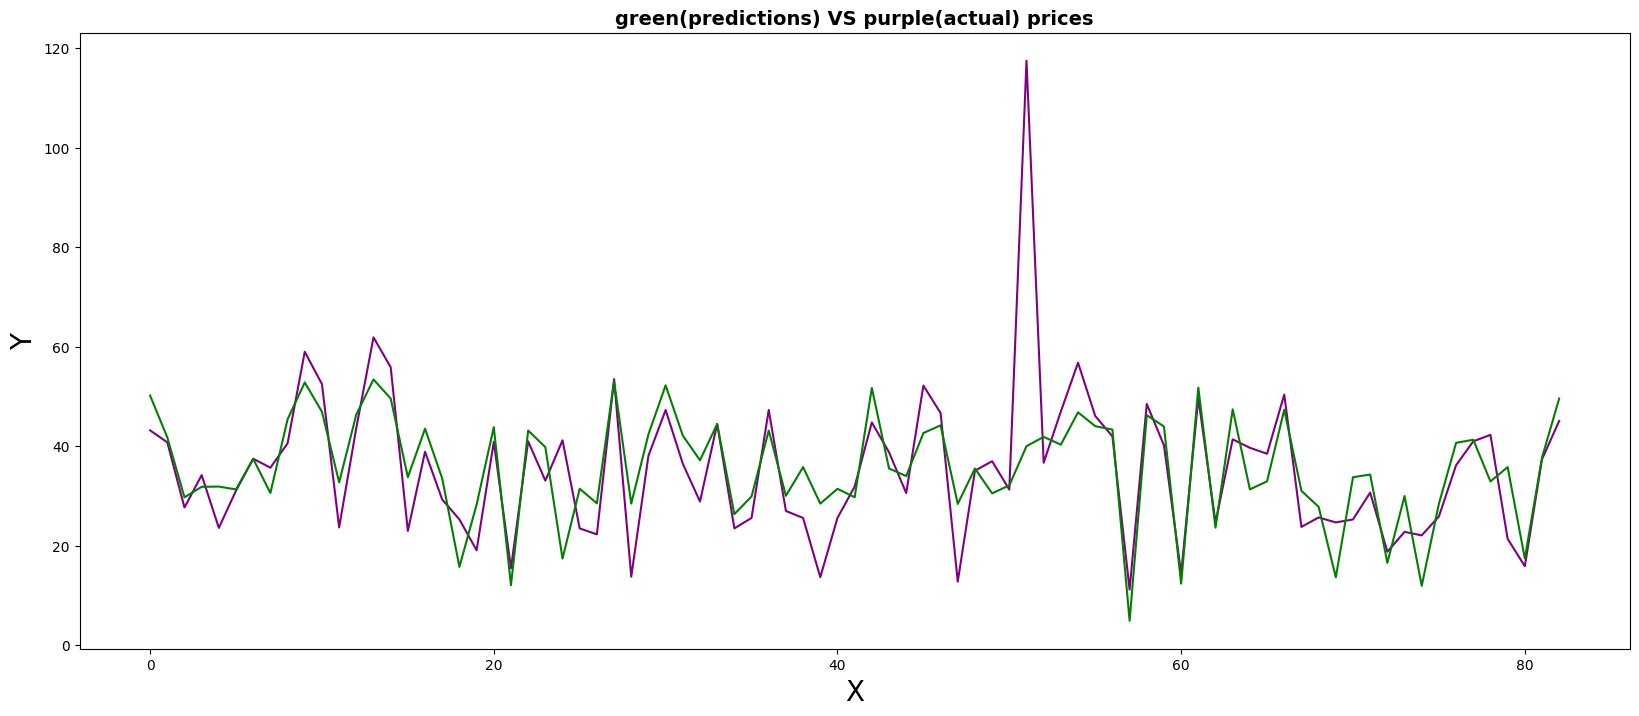

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

In [80]:
y_test

147    43.2
217    40.8
277    27.7
32     34.2
182    23.6
       ... 
223    42.3
205    21.4
40     15.9
17     37.4
358    45.1
Name: Y house price of unit area, Length: 83, dtype: float64

In [81]:
#PERHAPS YOU ARE BORED OF STUPID LINEAR REGRESSION, LETS TRY SOMETHING COOL

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_predict = gbr.predict(X_test)

print("R-squared value of GradientBoostingRegressor: {sc}".format(sc = gbr.score(X_test, y_test)))
print("The mean squared error of GradientBoostingRegressor: {}".format(mean_squared_error(y_test, gbr_y_predict)))
print("The mean absoluate error of GradientBoostingRegressor: {}".format(mean_absolute_error(y_test,gbr_y_predict)))

R-squared value of GradientBoostingRegressor: 0.5231676313483387
The mean squared error of GradientBoostingRegressor: 105.71012718251905
The mean absoluate error of GradientBoostingRegressor: 5.30547832223497


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

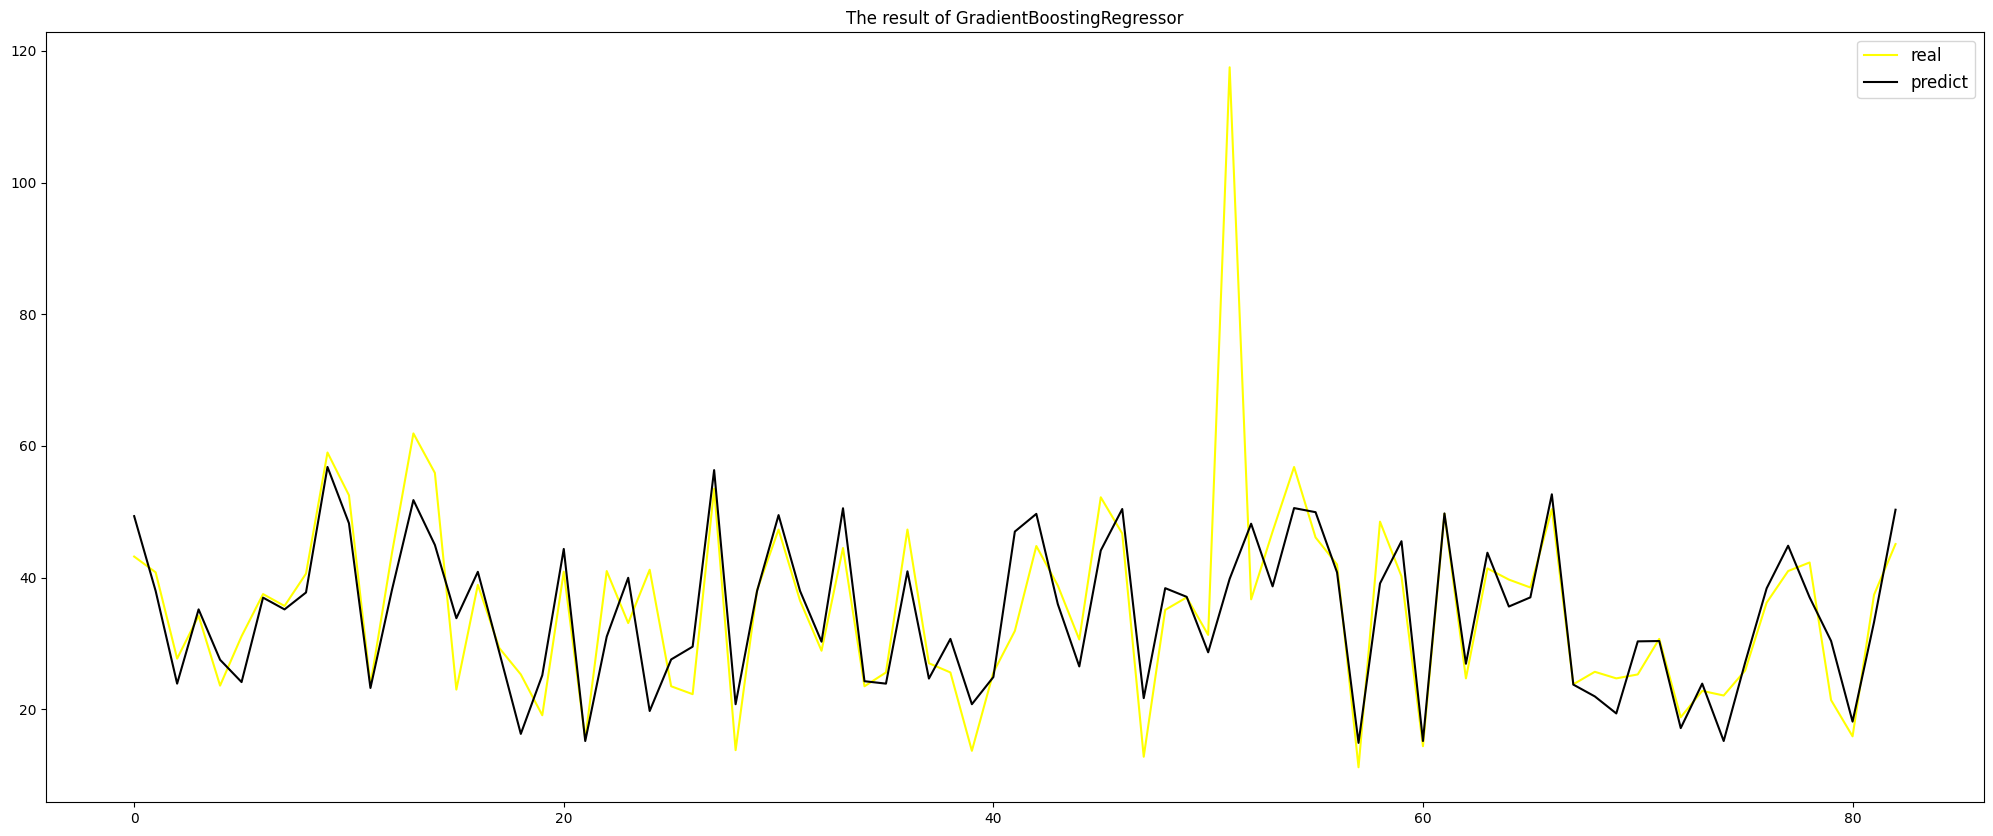

In [83]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='yellow')
plt.plot(gbr_y_predict[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

In [84]:
#perhaps lets add MINMAX SCALING AND SEE WHATS GONNA HAPPEEN

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)
rfr_y_predict = rfr.predict(X_test)

print("R-squared value of RandomForestRegressor: {sc}".format(sc = rfr.score(X_test, y_test)))
print("The mean squared error of RandomForestRegressor: {}".format(mean_squared_error(y_test, rfr_y_predict)))
print("The mean absoluate error of RandomForestRegressor: {}".format(mean_absolute_error(y_test,rfr_y_predict)))
#BETTER

R-squared value of RandomForestRegressor: 0.538368271118469
The mean squared error of RandomForestRegressor: 102.34026039285487
The mean absoluate error of RandomForestRegressor: 4.734808423216664


Text(0.5, 1.0, 'The result of RandomForestRegressor')

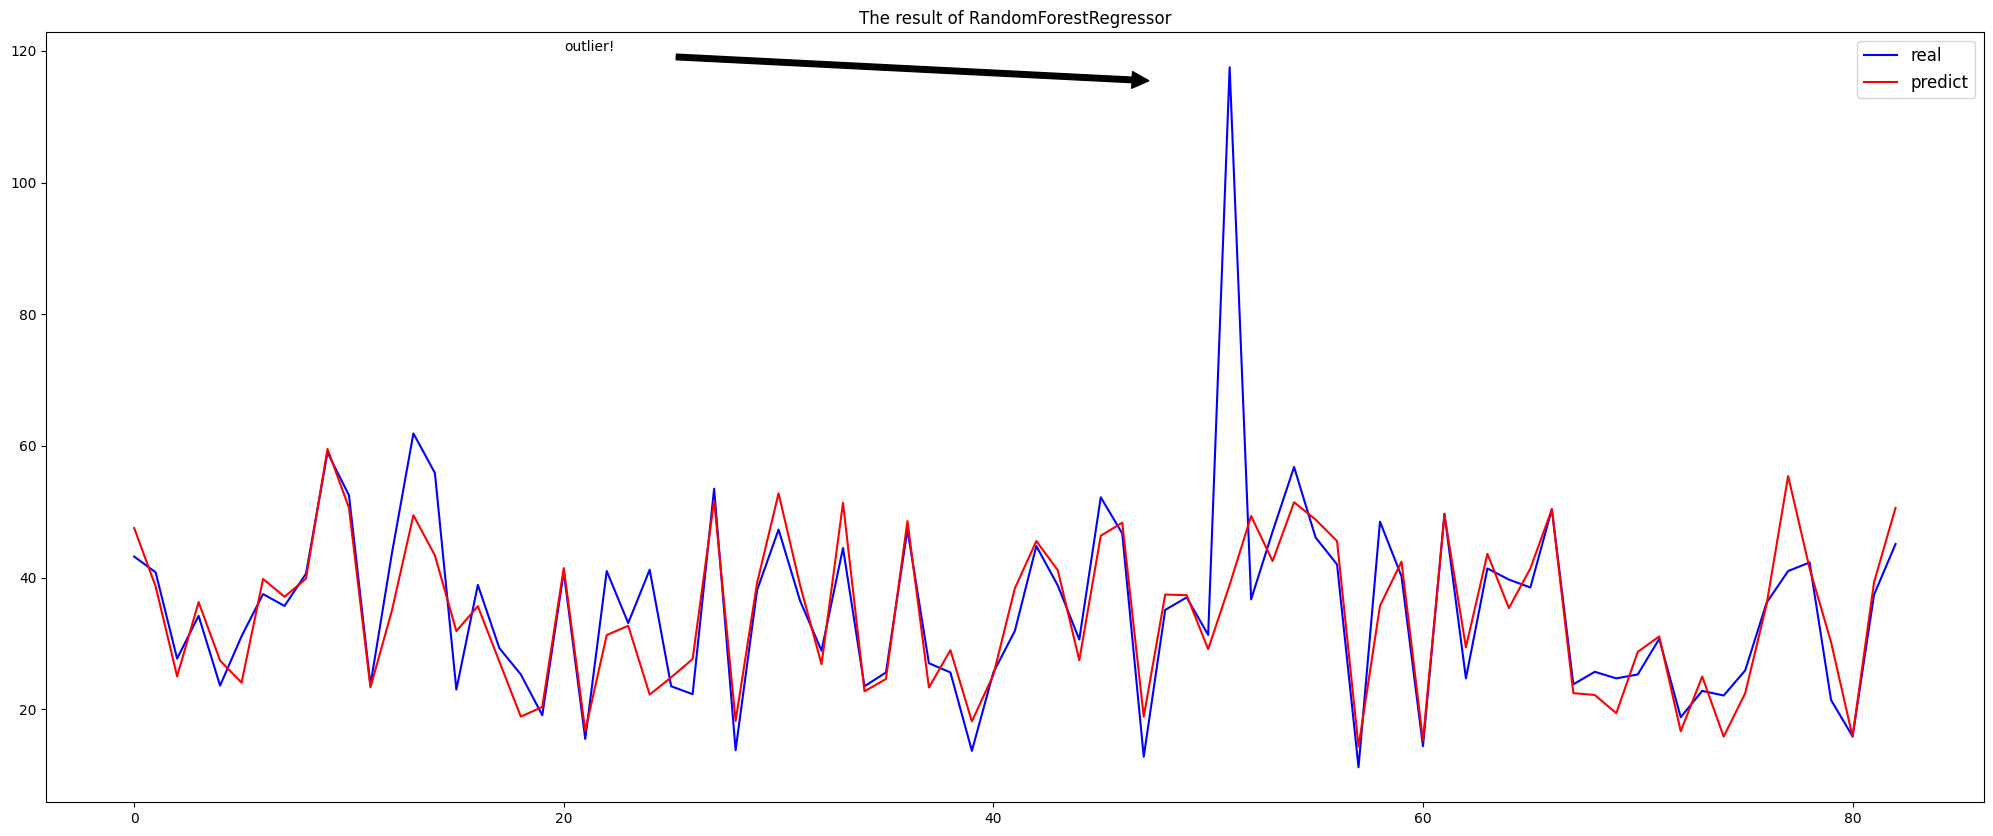

In [87]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_predict[:200],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

In [88]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    #print('______')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)  # maybe parameter tuning
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


print('Testing set evaluation:\n-------')
print_evaluate(y_test, test_pred)
print('\n')
print('Training set evaluation:\n-------')
print_evaluate(y_train, train_pred)
#congratulations

Testing set evaluation:
-------
MAE: 4.699735342712877
MSE: 102.28478694567853
RMSE: 10.113594165561446
R2 Square 0.5386184981867677


Training set evaluation:
-------
MAE: 2.1060521377397383
MSE: 8.737446745246855
RMSE: 2.955917242624843
R2 Square 0.9495998218676357


Text(0.5, 1.0, 'The result of RandomForestRegressor')

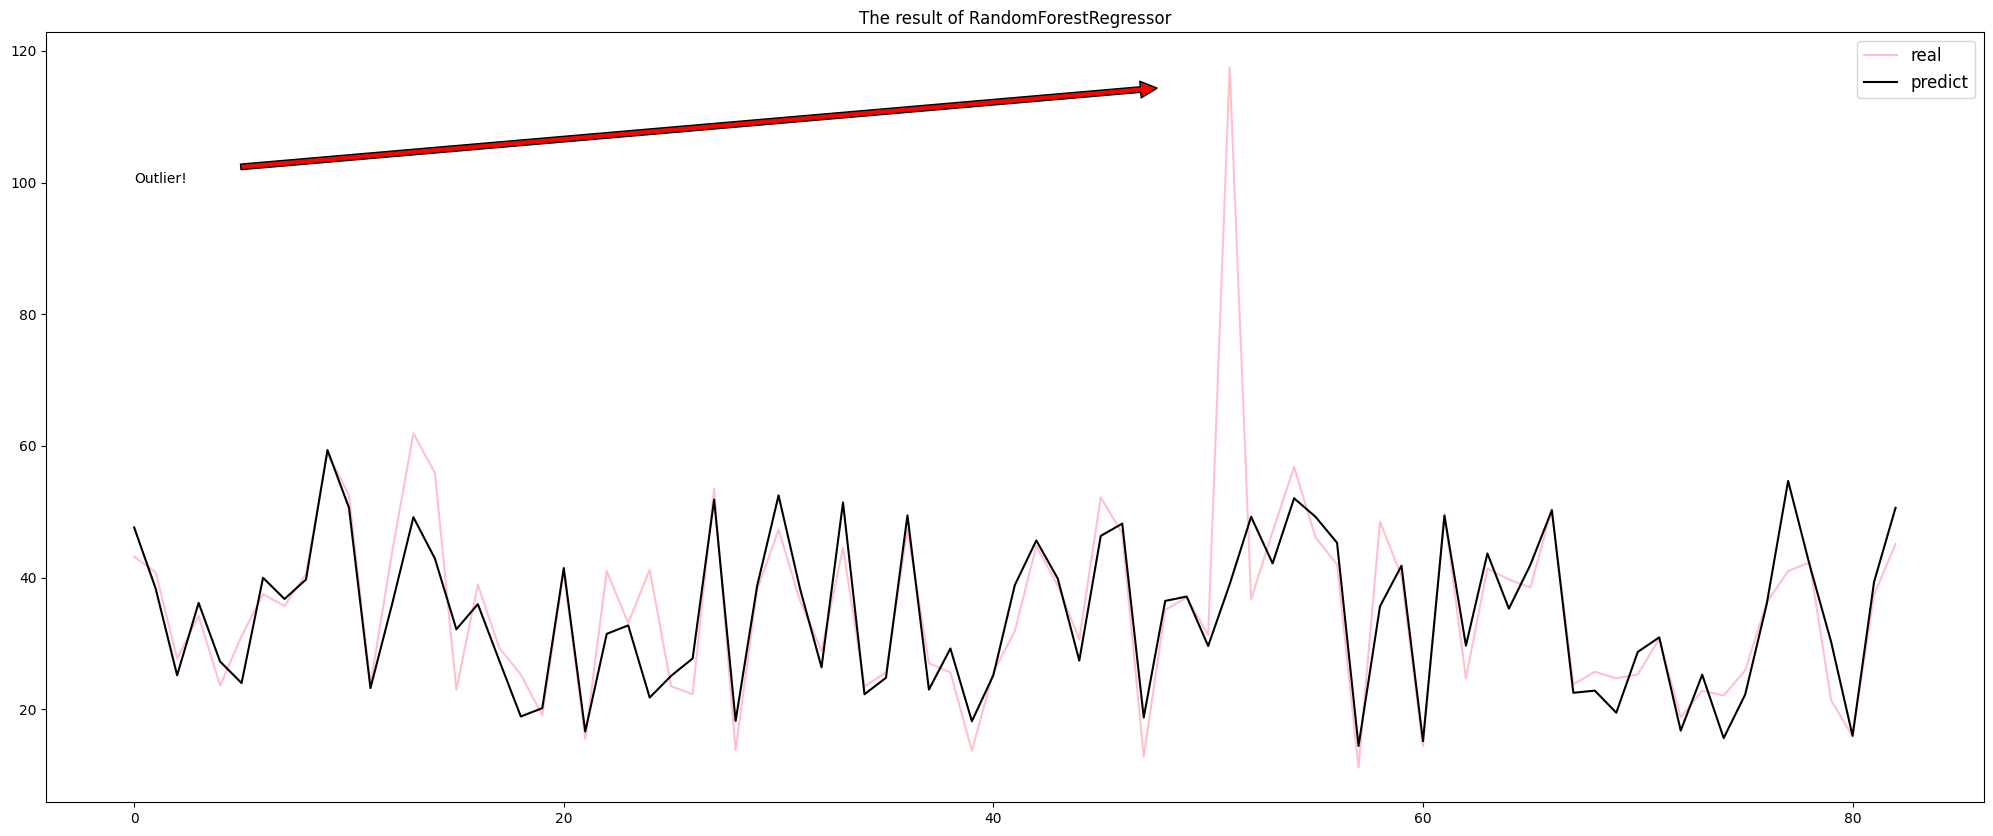

In [90]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(test_pred[:100],c='black')  #predicts
plt.annotate(

'Outlier!', xy=(50, 115), xytext=(0, 100),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.05)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

# HOMEWORK #7 STARTS HERE

In [91]:
#Now let's try to find incorrect values, aka outliers. 

In [92]:
dataset = pd.read_csv("Real estate.csv")
dataset = dataset.drop('No',axis=1)
X = dataset
#X = dataset.drop('Y house price of unit area',axis=1)
Y = dataset['Y house price of unit area']

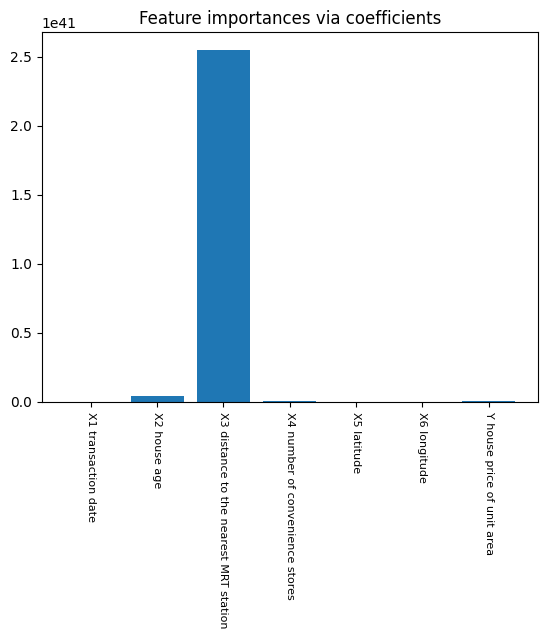

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-50, 50, num=5)).fit(X, Y)
#Here i've tried many other logspace params like logspace(-5, 5, num=5) and so one.
#But this one i like more
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.bar(height=importance, x=feature_names)
plt.xticks(fontsize=8, rotation = -90)
plt.title("Feature importances via coefficients")
plt.show()

In [94]:
#as we can see column x3 are important, let see it's values

<Axes: >

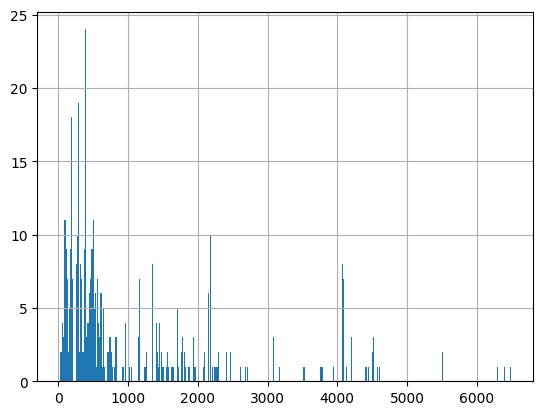

In [95]:
X['X3 distance to the nearest MRT station'].hist(bins=400)


In [96]:
X['X3 distance to the nearest MRT station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

In [97]:
#look at the mean and max values - it's too big difference between them, lets' clean up unnormal values (outliers)

In [98]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
y_outliers = iso.fit_predict(X)

In [99]:
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        X.drop(i, inplace = True)

In [100]:
X.shape

(334, 7)

<Axes: >

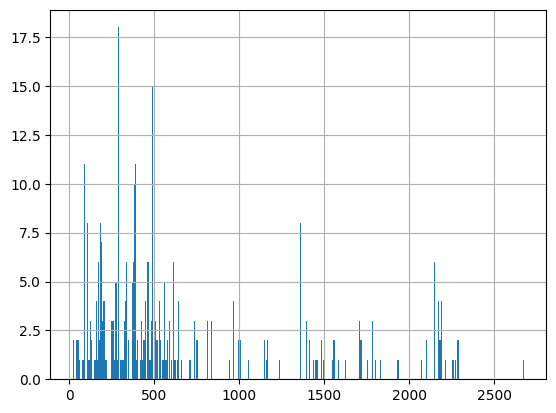

In [101]:
X['X3 distance to the nearest MRT station'].hist(bins=400)


In [102]:
Y=X['Y house price of unit area']
X.drop('Y house price of unit area', axis=1, inplace=True)
#X.drop('X1 transaction date', axis=1, inplace=True)
#X.drop('X5 latitude', axis=1, inplace=True)
#X.drop('X6 longitude', axis=1, inplace=True)
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
408,2013.417,18.5,2175.74400,3,24.96330,121.51243
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [103]:
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
408    28.1
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 334, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2, shuffle=True)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

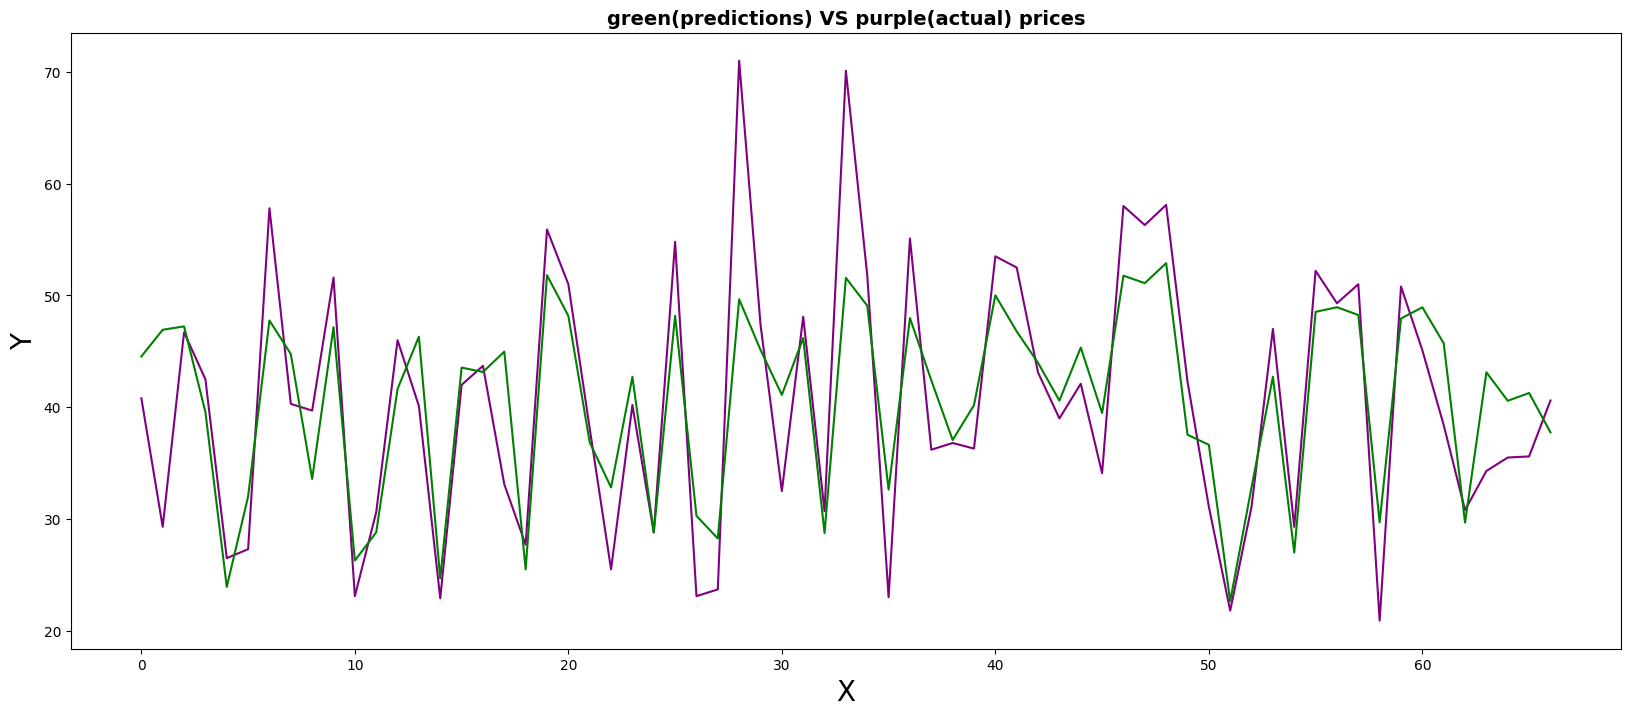

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

In [106]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 4.790813307392807


In [107]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 39.35672154063849


In [108]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 6.273493567434216


In [109]:
from sklearn.metrics import r2_score  # It explains how well a model performs when replicating the observed outcomes
r2 = r2_score(y_test,y_pred)
print(r2)  #remember its near to 1 meaning its good 

0.7120408924331036


In [110]:
#R2 still low uhhh, but fills better, lets do Forrest Regression and compare test and train params

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000)  # maybe parameter tuning
rf_reg.fit(X_train, y_train)
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)
print('Testing set evaluation:\n-------')
print_evaluate(y_test, test_pred)
print('\n')
print('Training set evaluation:\n-------')
print_evaluate(y_train, train_pred)
#congratulations

Testing set evaluation:
-------
MAE: 3.730460846363392
MSE: 23.787123638784394
RMSE: 4.877204490154621
R2 Square 0.8259580923798499


Training set evaluation:
-------
MAE: 1.6452622040900926
MSE: 4.874844187512334
RMSE: 2.2079049317197366
R2 Square 0.9560027768362482


In [112]:
#WOW look at R2 of Testing set! It's done! Let's do some plot

Text(0.5, 1.0, 'The result of RandomForestRegressor')

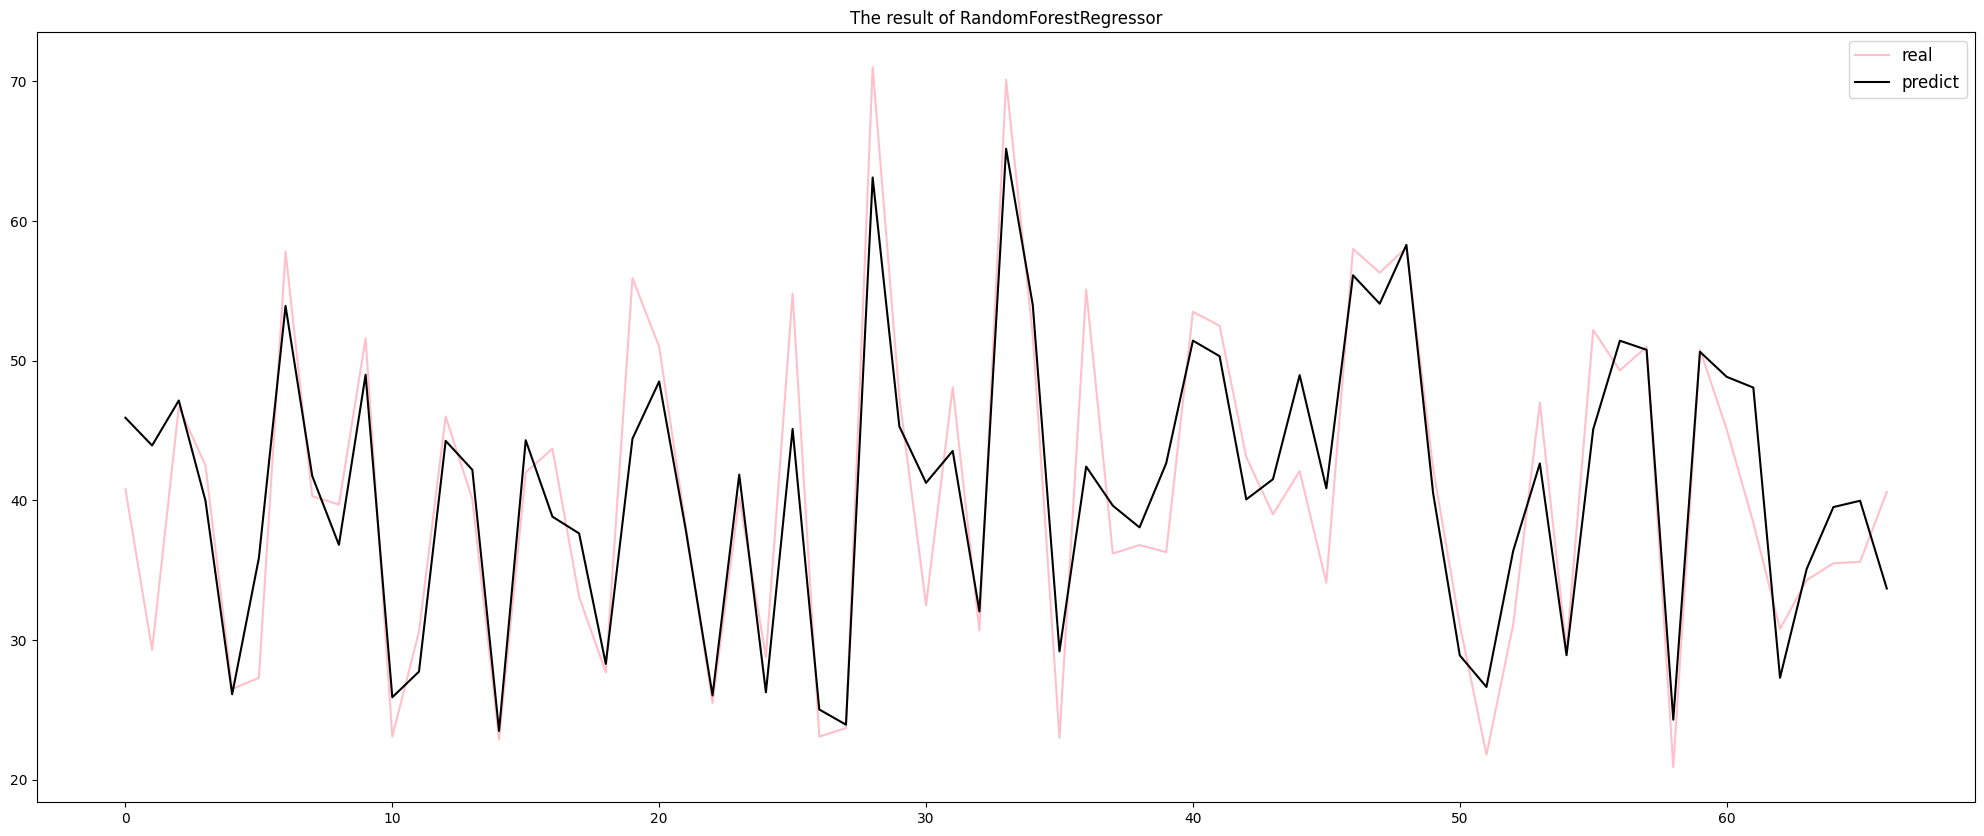

In [113]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:len(y_test)],c='pink')
plt.plot(test_pred[:len(test_pred)],c='black')  #predicts
plt.annotate(

'Outlier!', xy=(50, 115), xytext=(0, 100),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.05)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

In [114]:
#PS: BUUUUUT what if we will add some extra specific data at our original dataset? let's try Data Augmentation
#with clearing "Y house price of unit area" column from unnormal values (outliers)

In [115]:
import seaborn as sns
import pandas as pd
from ctgan import CTGAN

data = pd.read_csv('Real estate.csv')
discrete_columns = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 
                    'Y house price of unit area']
#data.drop('Y house price of unit area', axis=1, inplace=True)  # drop columns
data.drop('No', axis=1, inplace=True)  # drop columns
#data.drop('X1 transaction date', axis=1, inplace=True)  # drop columns
#data.drop('X5 latitude', axis=1, inplace=True)  # drop columns
#data.drop('X6 longitude', axis=1, inplace=True)  # drop columns
print('Original data:\n-------')
data.head()

Original data:
-------


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [116]:
#clean data using quantile
import scipy.stats as stats

Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(371, 7)

In [117]:
#ctgan = CTGAN()
ctgan = CTGAN(epochs=5)
ctgan.fit(data_clean, discrete_columns)

In [118]:
new_data = ctgan.sample(3*len(data_clean))
#yeap, let's 4x data
print('CTGan data:\n-------')
new_data.head()

CTGan data:
-------


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2013.385667,0.0,579.2083,10,24.961638,121.537666,24.5
1,2013.380801,18.1,967.4000,6,24.960561,121.541783,50.8
2,2013.512541,40.9,1497.7130,3,24.967982,121.511716,37.5
3,2013.365679,4.3,1978.6710,6,24.985905,121.547995,30.7
4,2013.430048,2.3,109.9455,8,24.969217,121.541318,48.5


In [121]:
#data_clean.append(new_data, ignore_index = True)
data_clean = pd.concat([data_clean, new_data])


In [122]:
y = data_clean['Y house price of unit area']
data_clean.drop('Y house price of unit area', axis=1, inplace=True)

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_clean,y,test_size=0.3,random_state=2, shuffle=True)


In [124]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000)  # maybe parameter tuning
rf_reg.fit(X_train, y_train)
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)
print('Testing set evaluation:\n-------')
print_evaluate(y_test, test_pred)
print('\n')
print('Training set evaluation:\n-------')
print_evaluate(y_train, train_pred)

Testing set evaluation:
-------
MAE: 9.054083347747174
MSE: 133.52958182620327
RMSE: 11.55550006820143
R2 Square 0.12808751191559287


Training set evaluation:
-------
MAE: 3.412099547511998
MSE: 19.02105563642826
RMSE: 4.361313521913813
R2 Square 0.877122815953663


Text(0.5, 1.0, 'The result of RandomForestRegressor')

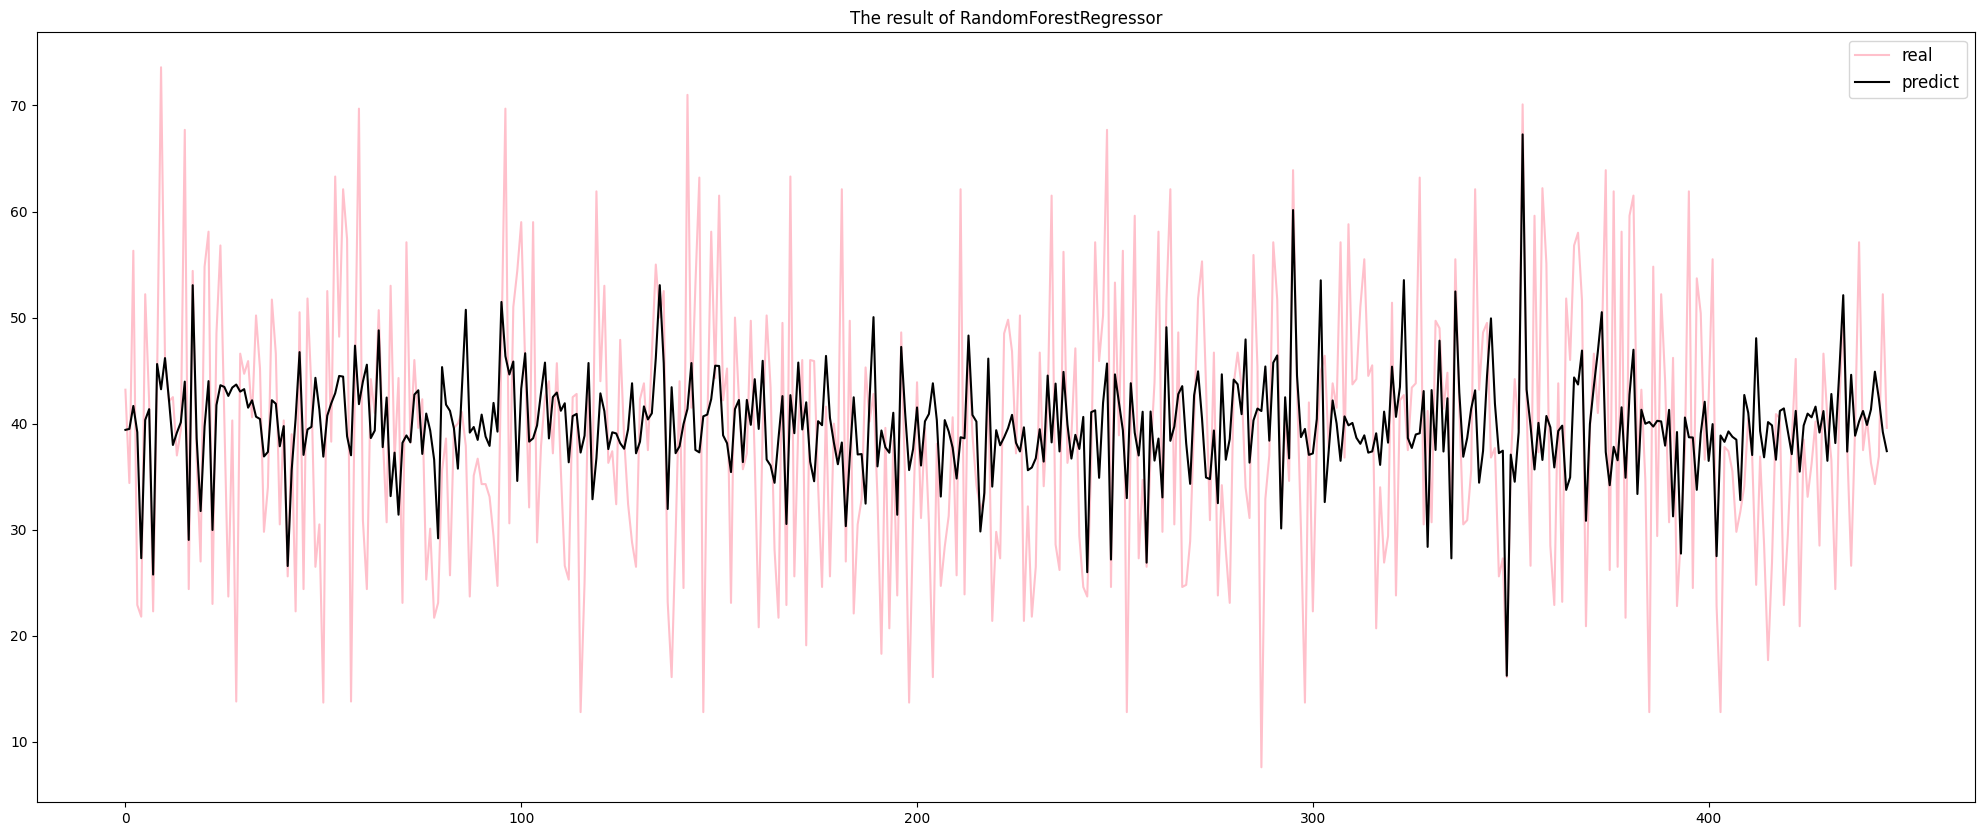

In [125]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:len(y_test)],c='pink')
plt.plot(test_pred[:len(test_pred)],c='black')  #predicts
plt.annotate(

'Outlier!', xy=(50, 115), xytext=(0, 100),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.05)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

In [126]:
#Done!